# Example of Data Clustering with KMeans

First we import all necessary libraries and specific the name of file with data.
The library pandas is to read easily the csv files, while the library sklearn have the many algorithms about machine learning.

In [9]:
#import libraries
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

# Data about cars
This original dataset is here: https://www.kaggle.com/orgesleka/used-cars-database. This dataset have 20 columns. The total of register in this dataset is: 371528

First we read the dataset and print the name of columns

In [10]:
df = pd.read_csv('autos.csv', encoding='latin-1')
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We will filter the data only to cars year between 1990 and 2016 and price between 100 and 100000.

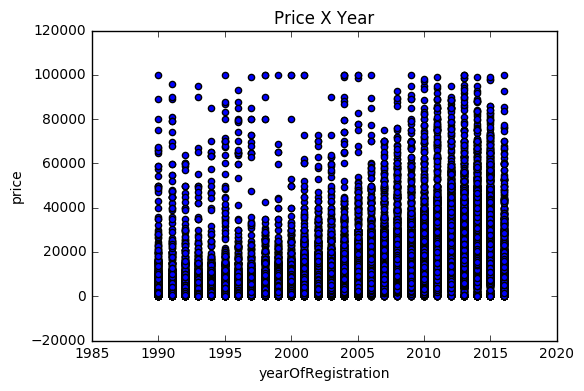

In [11]:
cars_filters = df[(df.yearOfRegistration >= 1990) & (df.yearOfRegistration <= 2016) & (df.price >= 100) & (df.price <= 100000)]
years = set(cars_filters['yearOfRegistration'].values)
prices = set(cars_filters['price'].values)
cars_filters.plot.scatter(x='yearOfRegistration', y='price', title='Price X Year')

Consider year and price to separate the cars in k groups

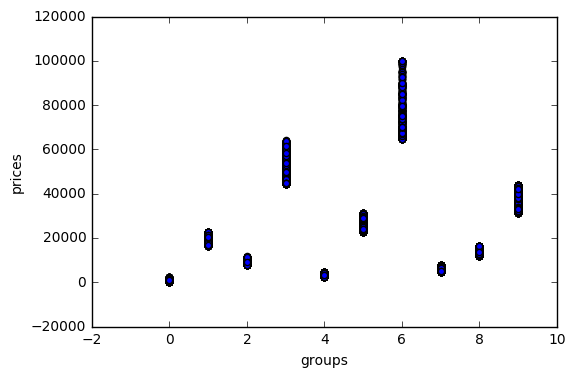

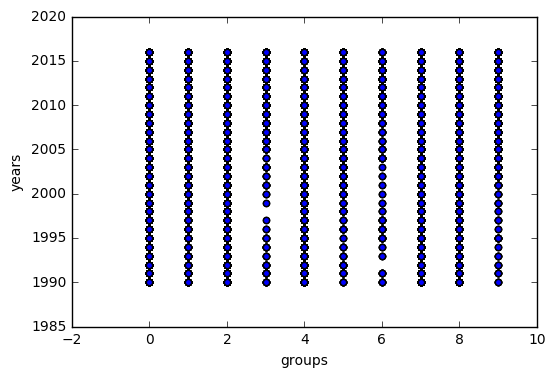

In [14]:
years_and_price = [[year, price] for year, price in zip(cars_filters['yearOfRegistration'].values, cars_filters['price'].values)]
kmeans = KMeans(n_clusters=10, random_state=0).fit(years_and_price)
len(kmeans.labels_), len(years_and_price)
kmeans.labels_
result = pd.DataFrame({'groups' : kmeans.labels_,
 'prices' : cars_filters['price'].values,
 'years' : cars_filters['yearOfRegistration'].values
  }, columns=['groups','prices', 'years'])

result.plot.scatter(x='groups', y='prices')
result.plot.scatter(x='groups', y='years')

# Data about games
This original dataset is here: https://www.kaggle.com/egrinstein/20-years-of-games
This dataset have 10 columns: score_phrase, title, url, platform, score, genre, editors_choice, release_year, release_month and release_day
The number total of register in this dataset is: 18625

First we read the dataset and print the name of columns

In [15]:
df = pd.read_csv('ign.csv', encoding='latin-1')
df['hash_genre'] =  df.apply(lambda x: hash(x['genre']), axis=1)
df['hash_platform'] =  df.apply(lambda x: hash(x['platform']), axis=1)
df.columns

Index(['Unnamed: 0', 'score_phrase', 'title', 'url', 'platform', 'score',
       'genre', 'editors_choice', 'release_year', 'release_month',
       'release_day', 'hash_genre', 'hash_platform'],
      dtype='object')

Plot the number of games in each plataform

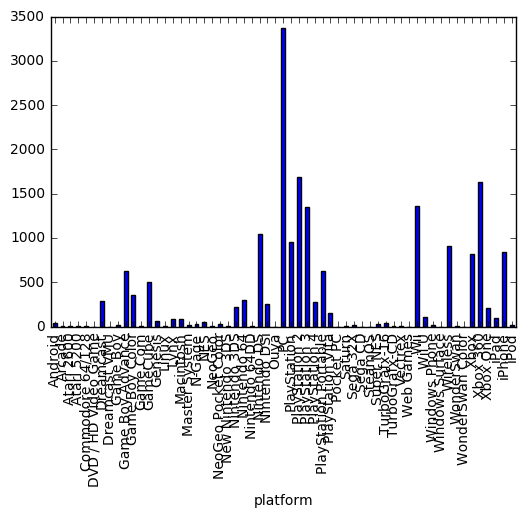

In [16]:
df.groupby(['platform']).count()['score'].plot(kind='bar')

We have many platforms, then we will filter only the platforms with more then 100 games

Number of platforms with more 100 games: 22


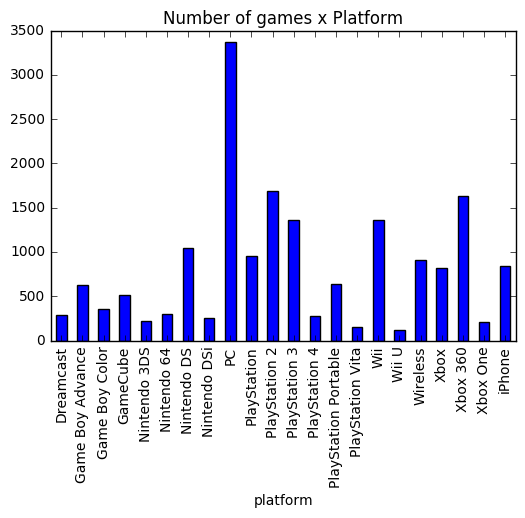

In [17]:
games_filters = df.groupby("platform").filter(lambda x: len(x) >= 100)
print('Number of platforms with more 100 games:', len(games_filters.groupby(['platform']).count()))
games_filters.groupby(['platform']).count()['score'].plot(kind='bar', title='Number of games x Platform')

Create k group with games by scores.

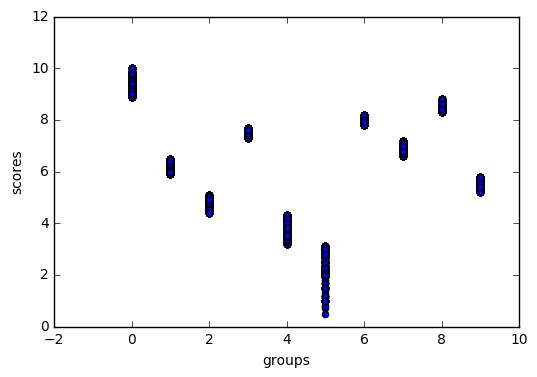

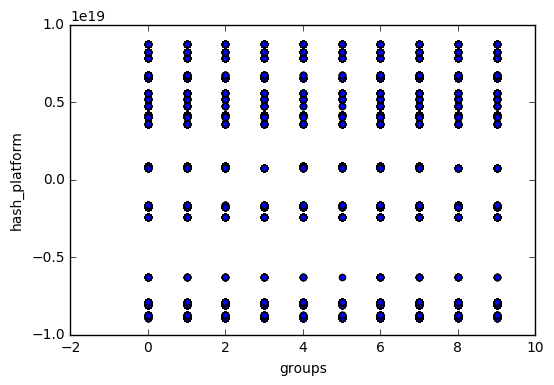

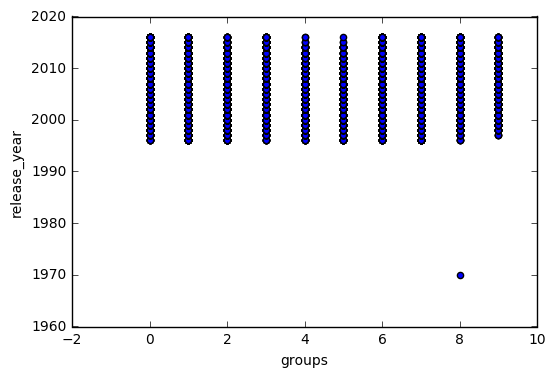

In [8]:
scores = [[score] for score in games_filters['score'].values]
kmeans = KMeans(n_clusters=10).fit(scores)
result = pd.DataFrame({'groups' : kmeans.labels_,
 'scores' : games_filters['score'].values,
 'platforms' : games_filters['platform'].values,
 'hash_genre' : games_filters['hash_genre'].values,
 'hash_platform' : games_filters['hash_platform'].values,
 'release_year': games_filters['release_year'].values,
  }, columns=['groups','scores', 'platforms', 'hash_genre', 'hash_platform', 'release_year'])

result.plot.scatter(x='groups', y='scores')
result.plot.scatter(x='groups', y='hash_platform')
result.plot.scatter(x='groups', y='release_year')